In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_path = './The IQ-OTHNCCD lung cancer dataset/'
categories = os.listdir(base_path)
print(categories)

['Bengin cases', 'Malignant cases', 'Normal cases']


In [3]:
def load_images_from_folder(folder, num_images=None):
    images = [] # list to store images
    if num_images is not None: # if num_images is not None, randomly select num_images images.
        indices = np.random.permutation(len(os.listdir(folder)))[:num_images]
    else: # if num_images is None, load all images randomly.
        indices = np.random.permutation(len(os.listdir(folder)))
    filenames = np.array(os.listdir(folder))[indices] # get all files in the folder
    for filename in filenames:
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    return images

In [4]:
images = {}
for category in categories: # load images for each category
    images[category] = load_images_from_folder(os.path.join(base_path, category)) 

In [5]:
def show_images(images, titles=None):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for i, img in enumerate(images):
        axes[i].imshow(img, cmap="gray")
        axes[i].axis("off")
        if titles:
            axes[i].set_title(titles[i])
    plt.show()

Sample images from Bengin cases category


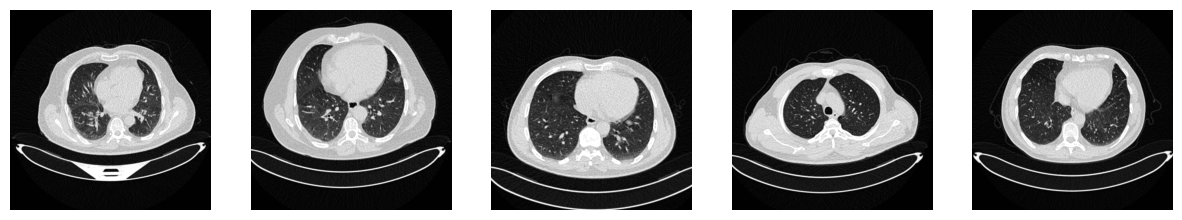

Sample images from Malignant cases category


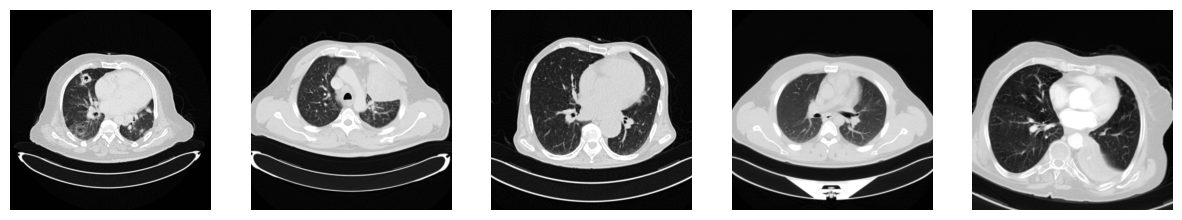

Sample images from Normal cases category


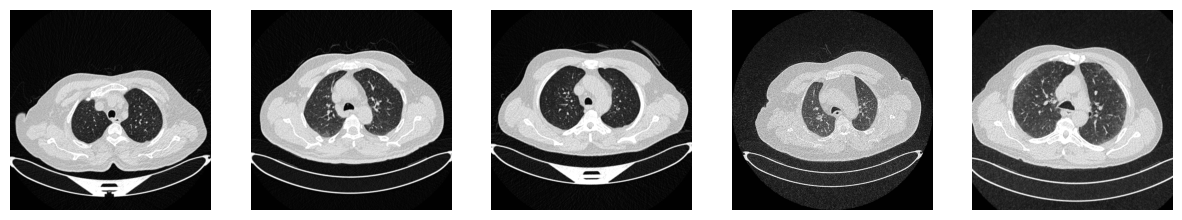

In [6]:
# Visualize a few images from each category
for category in categories:
    print(f"Sample images from {category} category")
    show_images(images[category][:5])

In [9]:
img = images[categories[0]][0]

In [13]:
def show_image(img):
    plt.imshow(img, "gray")
    plt.axis(False)
    plt.show()

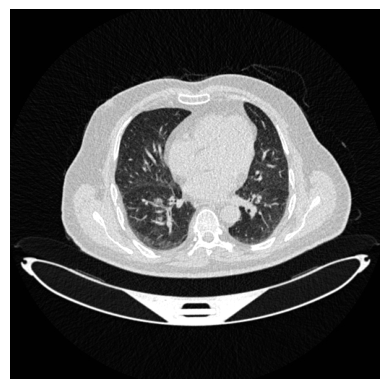

In [14]:
show_image(img)

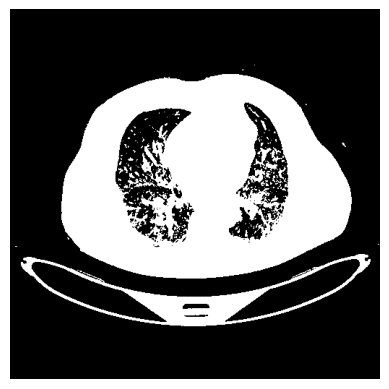

In [31]:
show_image(np.where(img > img.mean(), 255, 0).astype(np.uint8))

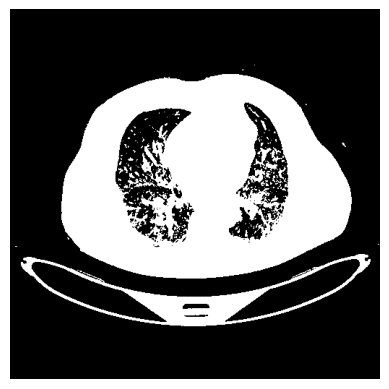

In [33]:
_, th = cv2.threshold(img, img.mean(), 255, cv2.THRESH_BINARY)
show_image(th)

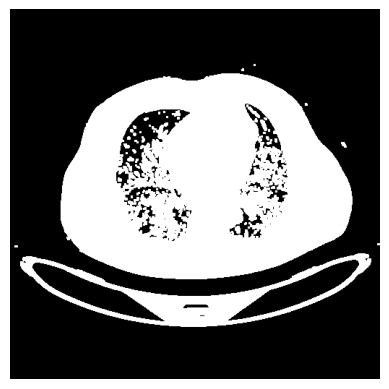

In [34]:
kernal = np.ones((3,3))
show_image(cv2.filter2D(th, 0, kernal))

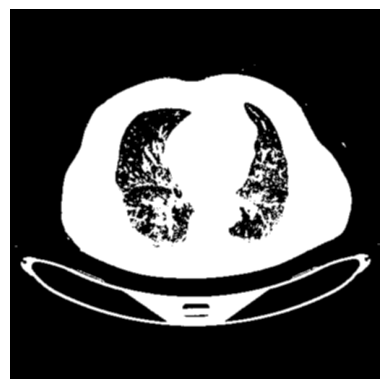

In [36]:
show_image(cv2.blur(th, (3,3)))

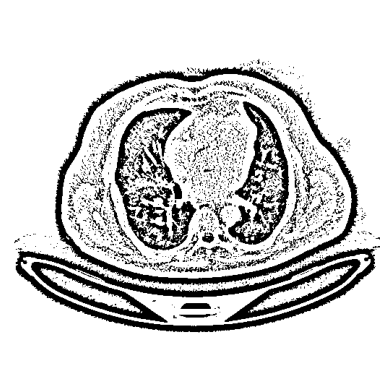

In [50]:
show_image(cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 19, 9))

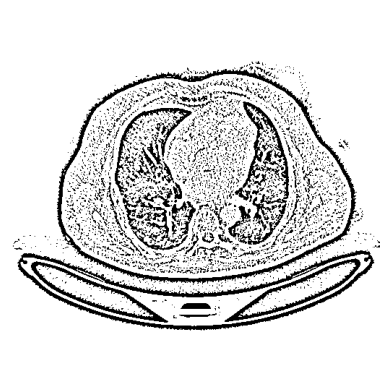

In [51]:
show_image(cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 19, 9))

In [3]:
[2]*2

[2, 2]

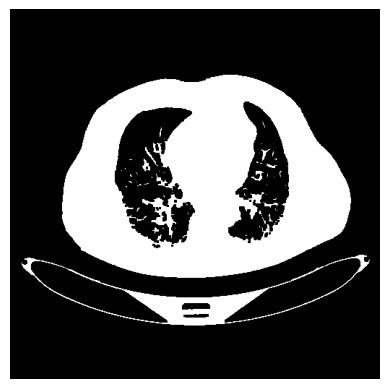

In [59]:
kernal = np.ones((3,3))
show_image(cv2.erode(th, kernal))

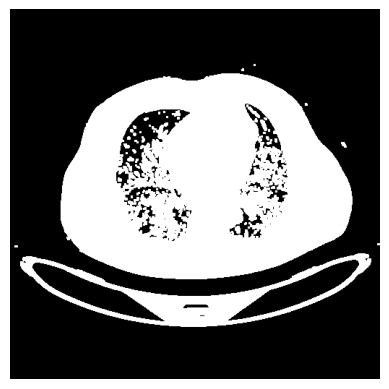

In [63]:
kernal = np.ones((3,3))
show_image(cv2.dilate(th, kernal))

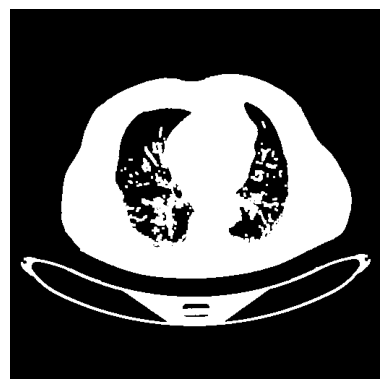

In [64]:
kernal = np.ones((3,3))
show_image(cv2.morphologyEx(th, cv2.MORPH_OPEN, kernal))

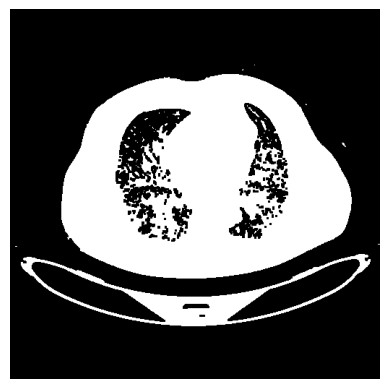

In [66]:
kernal = np.ones((3,3))
show_image(cv2.morphologyEx(th, cv2.MORPH_CLOSE, kernal))

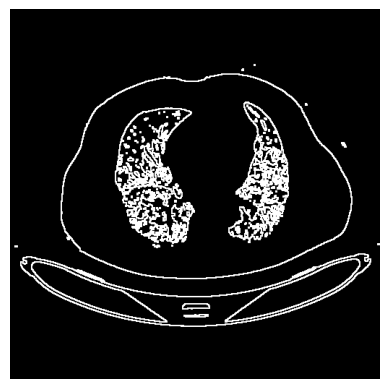

In [80]:
kernal = np.ones((3,3))
show_image(cv2.morphologyEx(th, cv2.MORPH_GRADIENT, kernal))